In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Admission_Predict.csv")

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
df.shape

(400, 9)

In [5]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
df.drop("Serial No.",axis="columns",inplace=True)

In [7]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [8]:
from scipy.stats import zscore
z_scores = zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

In [9]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [10]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
label_encoder = LabelEncoder()
df["University Rating"] = label_encoder.fit_transform(df["University Rating"])

C:\Users\HARSH\AppData\Local\Temp\ipykernel_16232\3392681903.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["University Rating"] = label_encoder.fit_transform(df["University Rating"])


In [11]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,3,4.5,4.5,9.65,1,0.92
1,324,107,3,4.0,4.5,8.87,1,0.76
2,316,104,2,3.0,3.5,8.00,1,0.72
3,322,110,2,3.5,2.5,8.67,1,0.80
4,314,103,1,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,2,3.5,3.5,9.04,1,0.82
396,325,107,2,3.0,3.5,9.11,1,0.84
397,330,116,3,5.0,4.5,9.45,1,0.91
398,312,103,2,3.5,4.0,8.78,0,0.67


In [12]:
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

C:\Users\HARSH\AppData\Local\Temp\ipykernel_16232\573768467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])


In [13]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.760985,1.745528,0.796596,1.091717,1.165643,1.775466,0.911194,0.92
1,0.624887,-0.071195,0.796596,0.595029,1.165643,0.452221,0.911194,0.76
2,-0.074250,-0.566665,-0.081420,-0.398346,0.048977,-1.023706,0.911194,0.72
3,0.450102,0.424275,-0.081420,0.098342,-1.067690,0.112928,0.911194,0.80
4,-0.249035,-0.731822,-0.959436,-1.391721,-0.509357,-0.667447,-1.097461,0.65
...,...,...,...,...,...,...,...,...
395,0.624887,0.424275,-0.081420,0.098342,0.048977,0.740621,0.911194,0.82
396,0.712279,-0.071195,-0.081420,-0.398346,0.048977,0.859374,0.911194,0.84
397,1.149240,1.415215,0.796596,1.588404,1.165643,1.436173,0.911194,0.91
398,-0.423819,-0.731822,-0.081420,0.098342,0.607310,0.299539,-1.097461,0.67


In [14]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(f_regression, k=4)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_new = selector.fit_transform(X, y)
mask = selector.get_support()
new_features = X.columns[mask]

In [15]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.760985,1.745528,0.796596,1.091717,1.165643,1.775466,0.911194
1,0.624887,-0.071195,0.796596,0.595029,1.165643,0.452221,0.911194
2,-0.074250,-0.566665,-0.081420,-0.398346,0.048977,-1.023706,0.911194
3,0.450102,0.424275,-0.081420,0.098342,-1.067690,0.112928,0.911194
4,-0.249035,-0.731822,-0.959436,-1.391721,-0.509357,-0.667447,-1.097461
...,...,...,...,...,...,...,...
395,0.624887,0.424275,-0.081420,0.098342,0.048977,0.740621,0.911194
396,0.712279,-0.071195,-0.081420,-0.398346,0.048977,0.859374,0.911194
397,1.149240,1.415215,0.796596,1.588404,1.165643,1.436173,0.911194
398,-0.423819,-0.731822,-0.081420,0.098342,0.607310,0.299539,-1.097461


In [16]:
print(X_new)          #select top 4 features

[[ 1.76098494  1.74552806  0.79659583  1.77546624]
 [ 0.62488682 -0.07119536  0.79659583  0.45222135]
 [-0.07425048 -0.56666538 -0.08142002 -1.02370565]
 ...
 [ 1.1492398   1.41521471  0.79659583  1.43617268]
 [-0.42381914 -0.73182206 -0.08142002  0.29953924]
 [ 1.41141628  1.58037139  0.79659583  1.79243092]]


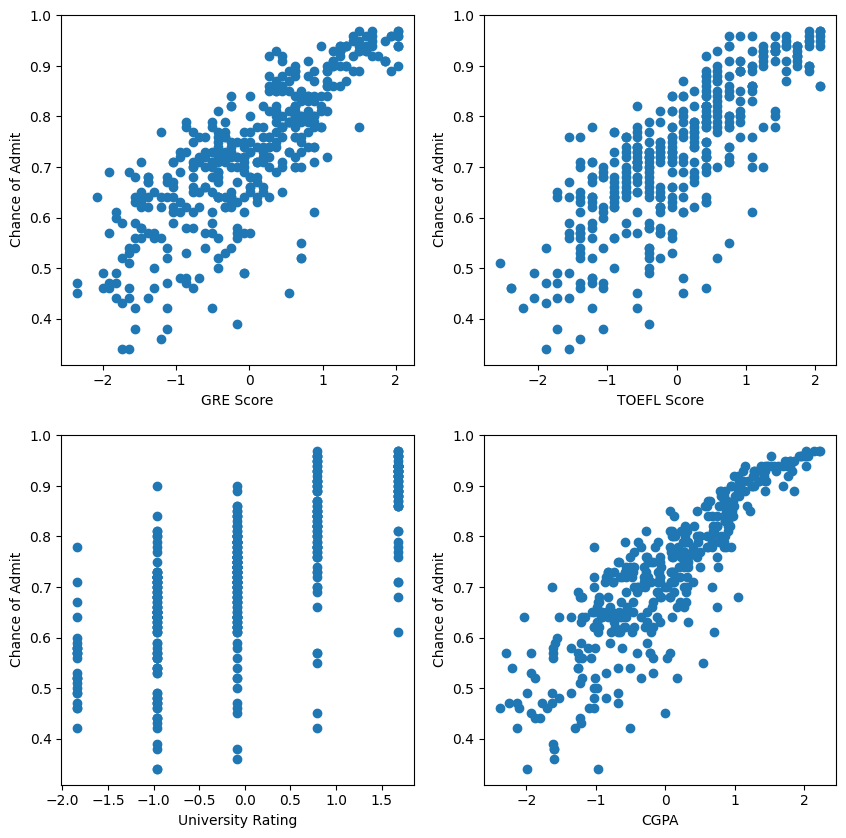

In [25]:
# Define the data
x1 = df["GRE Score"]
x2 = df["TOEFL Score"]
x3 = df["University Rating"]
x4 = df["CGPA"]
y = df["Chance of Admit "]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Scatter plot for GRE Score vs. Chance of Admit
axs[0, 0].scatter(x1, y)
axs[0, 0].set_xlabel("GRE Score")
axs[0, 0].set_ylabel("Chance of Admit")

# Scatter plot for TOEFL Score vs. Chance of Admit
axs[0, 1].scatter(x2, y)
axs[0, 1].set_xlabel("TOEFL Score")
axs[0, 1].set_ylabel("Chance of Admit")

# Scatter plot for University Rating vs. Chance of Admit
axs[1, 0].scatter(x3, y)
axs[1, 0].set_xlabel("University Rating")
axs[1, 0].set_ylabel("Chance of Admit")

# Scatter plot for CGPA vs. Chance of Admit
axs[1, 1].scatter(x4, y)
axs[1, 1].set_xlabel("CGPA")
axs[1, 1].set_ylabel("Chance of Admit")

# Show the plot
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

models=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]
for model in models:
    score=cross_val_score(model,X_train,y_train,cv=10,scoring='neg_mean_squared_error')
    rms_scores=np.sqrt(-score)
    print("model:",model.__class__.__name__)
    print("mean RMS:",rms_scores.mean())
    print("standard deviation :",rms_scores.std())

model: LinearRegression
mean RMS: 0.06413691696473696
standard deviation : 0.009649012888305683
model: DecisionTreeRegressor
mean RMS: 0.09887949803168503
standard deviation : 0.011502196058287572
model: RandomForestRegressor
mean RMS: 0.07476832172151829
standard deviation : 0.011631510031672277


In [29]:
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


RMSE: 0.07244387819916179


In [30]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


R-squared score: 0.7790121775996847


In [57]:
ch=lr.predict([[0.78,0.56,0.88,-0.0]])
if(ch>0.5):
    print("chance of admit Yes")
else:
    print("chance of admit NO")

chance of admit Yes


In [54]:
df[:50]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.760985,1.745528,0.796596,1.091717,1.165643,1.775466,0.911194,0.92
1,0.624887,-0.071195,0.796596,0.595029,1.165643,0.452221,0.911194,0.76
2,-0.074250,-0.566665,-0.081420,-0.398346,0.048977,-1.023706,0.911194,0.72
3,0.450102,0.424275,-0.081420,0.098342,-1.067690,0.112928,0.911194,0.80
4,-0.249035,-0.731822,-0.959436,-1.391721,-0.509357,-0.667447,-1.097461,0.65
5,1.149240,1.250058,1.674612,1.091717,-0.509357,1.249561,0.911194,0.90
6,0.362710,0.259118,-0.081420,-0.398346,0.607310,-0.684412,0.911194,0.75
7,-0.773388,-1.062135,-0.959436,-0.398346,0.607310,-1.193352,-1.097461,0.68
8,-1.297741,-0.896979,-1.837452,-1.391721,-2.184356,-1.023706,-1.097461,0.50
9,0.537495,0.093961,-0.081420,0.098342,-0.509357,-0.005825,-1.097461,0.45
